THIS NOTEBOOK LOOKS AT DATA FROM THE 2012 US PRESIDENTIAL ELECTION

In [1]:
# Importing packages for data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

In [2]:
# data for the polls obtained from HuffPost Pollster
# website: http://elections.huffingtonpost.com/pollster
# will use StringIO to work with csv data from HuffPost
# will use requests to grab data from web
import requests
from StringIO import StringIO

In [3]:
#url for data
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"
source = requests.get(url).text
poll_data=StringIO(source)

In [4]:
#create DataFrame
poll_df = pd.read_csv(poll_data)
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 588
Data columns (total 14 columns):
Pollster                  589 non-null object
Start Date                589 non-null object
End Date                  589 non-null object
Entry Date/Time (ET)      589 non-null object
Number of Observations    567 non-null float64
Population                589 non-null object
Mode                      589 non-null object
Obama                     589 non-null int64
Romney                    589 non-null int64
Undecided                 422 non-null float64
Pollster URL              589 non-null object
Source URL                587 non-null object
Partisan                  589 non-null object
Affiliation               589 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 69.0+ KB


In [5]:
poll_df.head(3)

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 2000-01-01 08:40:26 UTC,1000,Likely Voters,Live Phone,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 2000-01-01 18:30:15 UTC,3000,Likely Voters,Live Phone,49,48,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 2000-01-01 09:22:02 UTC,872,Likely Voters,Automated Phone,48,48,4,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None


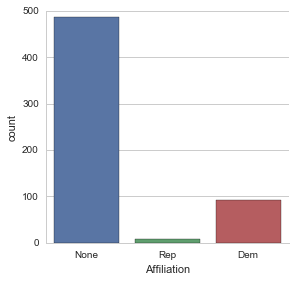

In [6]:
# looking at part affiliation
sns.factorplot('Affiliation',kind="count",data=poll_df)

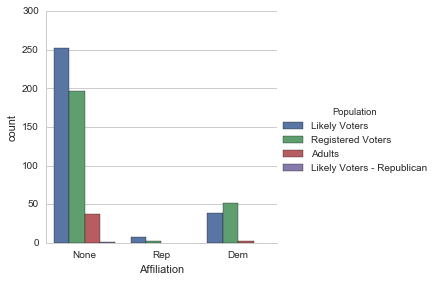

In [7]:
# above suggests relatively neutral stance among pollers, leaning Dem
sns.factorplot('Affiliation',data=poll_df,hue='Population',kind='count')

In [8]:
#from above chart, we can see a good number of likely voters and registered

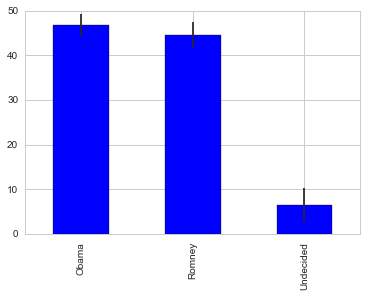

In [9]:
# Examine averages for Obama, Romney and undecided
avg = pd.DataFrame(poll_df.mean())
avg.drop('Number of Observations',axis=0,inplace=True)
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations',axis=0,inplace=True)
avg.plot(yerr=std,kind='bar',legend=False)

In [10]:
# undecideds will probably factor into the election given how close
poll_avg = pd.concat([avg,std],axis=1)
poll_avg.columns = ['Average', 'STD']
poll_avg

,Average,STD
Obama,46.772496,2.448627
Romney,44.573854,2.927711
Undecided,6.549763,3.702235


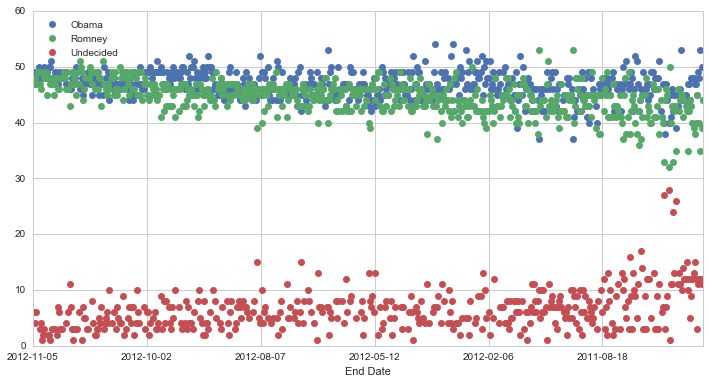

In [11]:
# we could look at a time series of voter sentiment
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],marker='o',
            linestyle='',figsize=(12,6))

Time is in reverse chronological order. Obama and Romney data points look like they are converging closer to end of polling. Undecideds are trending toward zero.

In [12]:
from datetime import datetime

In [13]:
#create a new column in poll_df for difference between Obama/Romney in polls
poll_df['Difference']=(poll_df.Obama - poll_df.Romney)/100

NOTE: Difference column is Obama minus Romney, so positive difference indicates a preference to Obama

In [14]:
# groupby Start Date
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()
poll_df.head(3)

,Start Date,Number of Observations,Obama,Romney,Undecided,Difference
0,2009-03-13,1403,44,44,12,0.00
1,2009-04-17,686,50,39,11,0.11
2,2009-05-14,1000,53,35,12,0.18


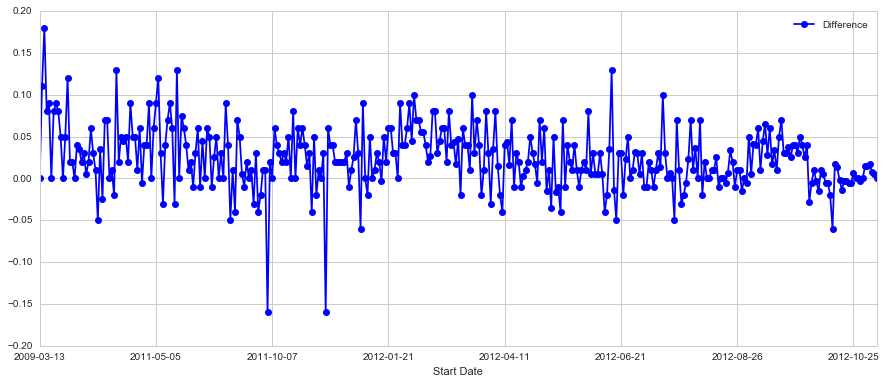

In [15]:
fig = poll_df.plot('Start Date','Difference',figsize=(15,6),marker='o',
                  linestyle='-',color='blue')

Hard not to notice 2 big moves around October 2011. But let's take a look at the differences around the debates. Debate dates were Oct 3, Oct 11 and Oct 22.

In [16]:
# write a loop to find out where the index for the month of October 2012 is
row = 0
xlimit = []
for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row)
        row += 1
    else:
        row += 1
print min(xlimit)
print max(xlimit)

329
356


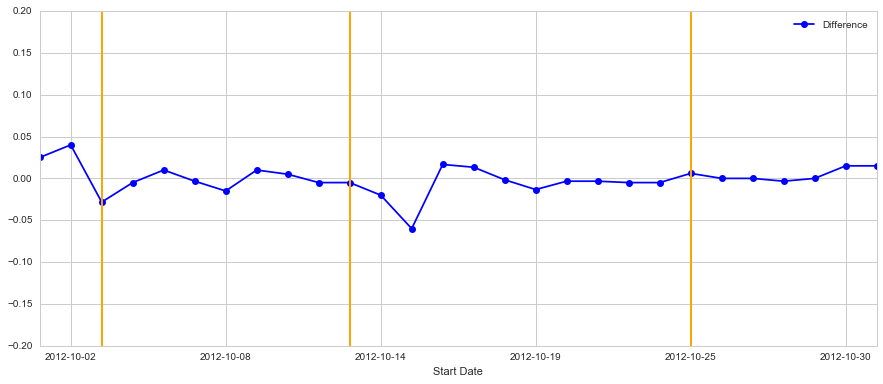

In [17]:
fig = poll_df.plot('Start Date','Difference',figsize=(15,6),marker='o',
                  linestyle='-',color='blue',xlim=(329,356))
#add line where debates are
plt.axvline(x=329+2,linewidth=2,color='orange')
plt.axvline(x=329+10,linewidth=2,color='orange')
plt.axvline(x=329+21,linewidth=2,color='orange')

Polls did not dip for Obama after 1st debate. Quite a dip right after 2nd debate favoring Romney but quickly goes back in favor of Obama.

DONOR DATA SET - huge dataset consisting of over 1 million entries

In [19]:
donor_df = pd.read_csv('Election_Donor_Data.csv')
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 129.9+ MB


In [25]:
donor_df.head(3)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073


In [26]:
# look at donation amounts
don_amounts = donor_df['contb_receipt_amt'].value_counts()
len(don_amounts.index)

8079

In [27]:
# 8079 different amts
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 236.07          1
 153.60          1
 116.35          1
 233.33          1
 86.21           1
 600.74          1
 130.20          1
 50.04           1
 78.55           1
 266.10          1
 77.83           1
 222.75          1
 217.75          1
 261.50          1
 240.25          1
-45.50           1
 161.50          1
 268.76          1
 100.56          1
 6.26            1
 114.43          1
 823.88     

In [28]:
don_mean = donor_df['contb_receipt_amt'].mean()
don_std = donor_df['contb_receipt_amt'].std()
print 'The average donation was %.2f with a std of %.2f' %(don_mean,don_std)

The average donation was 298.24 with a std of 3749.67


In [29]:
# huge standard deviation
# create a Series
top_donor = donor_df['contb_receipt_amt'].copy()
top_donor.sort_values(inplace=True)
top_donor

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

In [30]:
# given the negative values are meaningless, we need to remove them
top_donor = top_donor[top_donor > 0]
top_donor.sort_values(inplace=True)
top_donor.value_counts().head(5)

100    178188
50     137584
25     110345
250     91182
500     57984
Name: contb_receipt_amt, dtype: int64

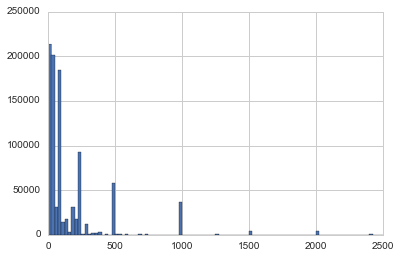

In [31]:
# do people usually give donations in round number amounts?
common_donation = top_donor[top_donor < 2500]
common_donation.hist(bins=100)

In [32]:
# spikes around the round numbers confirms assumption
# separate donations by party
# cand_nm column has the candidate  name
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [33]:
#Obama is only Democrat candidate so this makes our job easier to isolate parties
# a few ways to this: use map with dictionary of party affiliations or use for loop
# to go through all 1 million rows.
#here is example of for loop:
'''
for i in xrange(0,len(donor_df):
    if donor_df['cand_nm][i] == 'Obama, Barak':
        donor_df['Party'][i] = 'Democrat'
    else:
        donor_df['Party'][i] = 'Republican'
'''

"\nfor i in xrange(0,len(donor_df):\n    if donor_df['cand_nm][i] == 'Obama, Barak':\n        donor_df['Party'][i] = 'Democrat'\n    else:\n        donor_df['Party'][i] = 'Republican'\n"

In [34]:
# Create a dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican', 'Cain, Herman': 'Republican',
             'Gingrich, Newt': 'Republican', 'Huntsman, Jon': 'Republican', 
             'Johnson, Gary Earl': 'Republican', 'McCotter, Thaddeus G': 'Republican',
             'Obama, Barack': 'Democrat','Paul, Ron': 'Republican','Pawlenty, Timothy': 'Republican',
             'Perry, Rick': 'Republican', "Roemer, Charles E. 'Buddy' III": 'Republican',
             'Romney, Mitt': 'Republican', 'Santorum, Rick': 'Republican'}
# use map 
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [35]:
donor_df = donor_df[donor_df.contb_receipt_amt > 0]
donor_df.head(3)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican


In [36]:
#use groupby to aggregate data by candidate
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [37]:
# Obama has highest number of contributors as only candidate for party
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [38]:
# make a chart to make data more "readable"
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()
i = 0
for donation in cand_amount:
    print "The candidate %s raised $%.0f dollars "%(cand_amount.index[i],donation)
    i +=1

The candidate Bachmann, Michelle raised $2711439 dollars 
The candidate Cain, Herman raised $7101082 dollars 
The candidate Gingrich, Newt raised $12832770 dollars 
The candidate Huntsman, Jon raised $3330373 dollars 
The candidate Johnson, Gary Earl raised $566962 dollars 
The candidate McCotter, Thaddeus G raised $39030 dollars 
The candidate Obama, Barack raised $135877427 dollars 
The candidate Paul, Ron raised $21009620 dollars 
The candidate Pawlenty, Timothy raised $6004819 dollars 
The candidate Perry, Rick raised $20305754 dollars 
The candidate Roemer, Charles E. 'Buddy' III raised $373010 dollars 
The candidate Romney, Mitt raised $88335908 dollars 
The candidate Santorum, Rick raised $11043159 dollars 


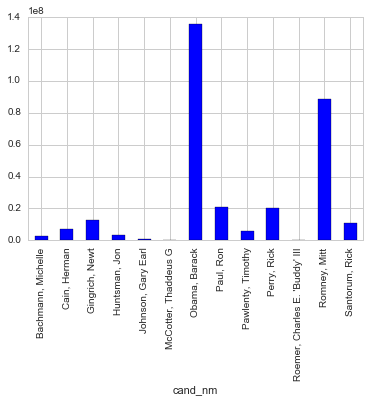

In [39]:
cand_amount.plot(kind='bar')

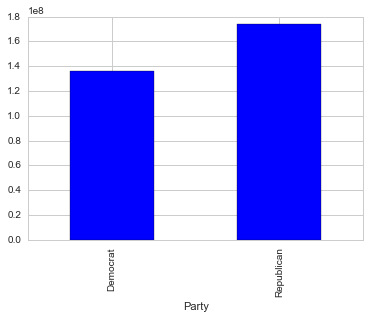

In [40]:
#oops lets make that easier to read in order to compare parties
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

In [41]:
# look at donations by occupation
# use a pivot table to create dataframe indexed by occupation with Party affiliation and contribution amount
occupation_df = donor_df.pivot_table('contb_receipt_amt', index='contbr_occupation',
                                     columns='Party',aggfunc='sum')

In [42]:
occupation_df.head(10)

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100,NaN
AREA VICE PRESIDENT,250,NaN
RESEARCH ASSOCIATE,100,NaN
TEACHER,500,NaN
THERAPIST,3900,NaN
'MIS MANAGER,NaN,177.6
(PART-TIME) SALES CONSULTANT & WRITER,NaN,285.0
(RETIRED),NaN,250.0
-,5000,2114.8


In [43]:
occupation_df.shape

(45067, 2)

In [44]:
# there is too much data for a bar chart and there is also data that needs to be cleaned up
#make cutoff point at 1 million dollars - use axis 1 to sum rows
occupation_df = occupation_df[occupation_df.sum(axis=1) > 1000000]

In [45]:
occupation_df.shape

(31, 2)

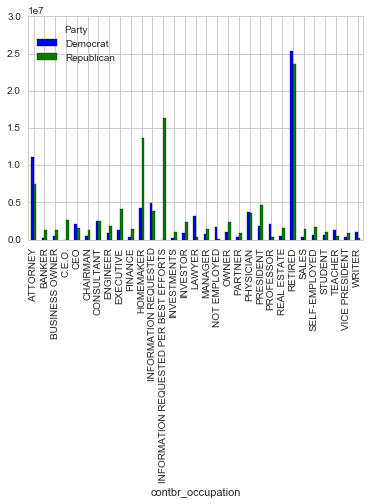

In [46]:
occupation_df.plot(kind='bar')

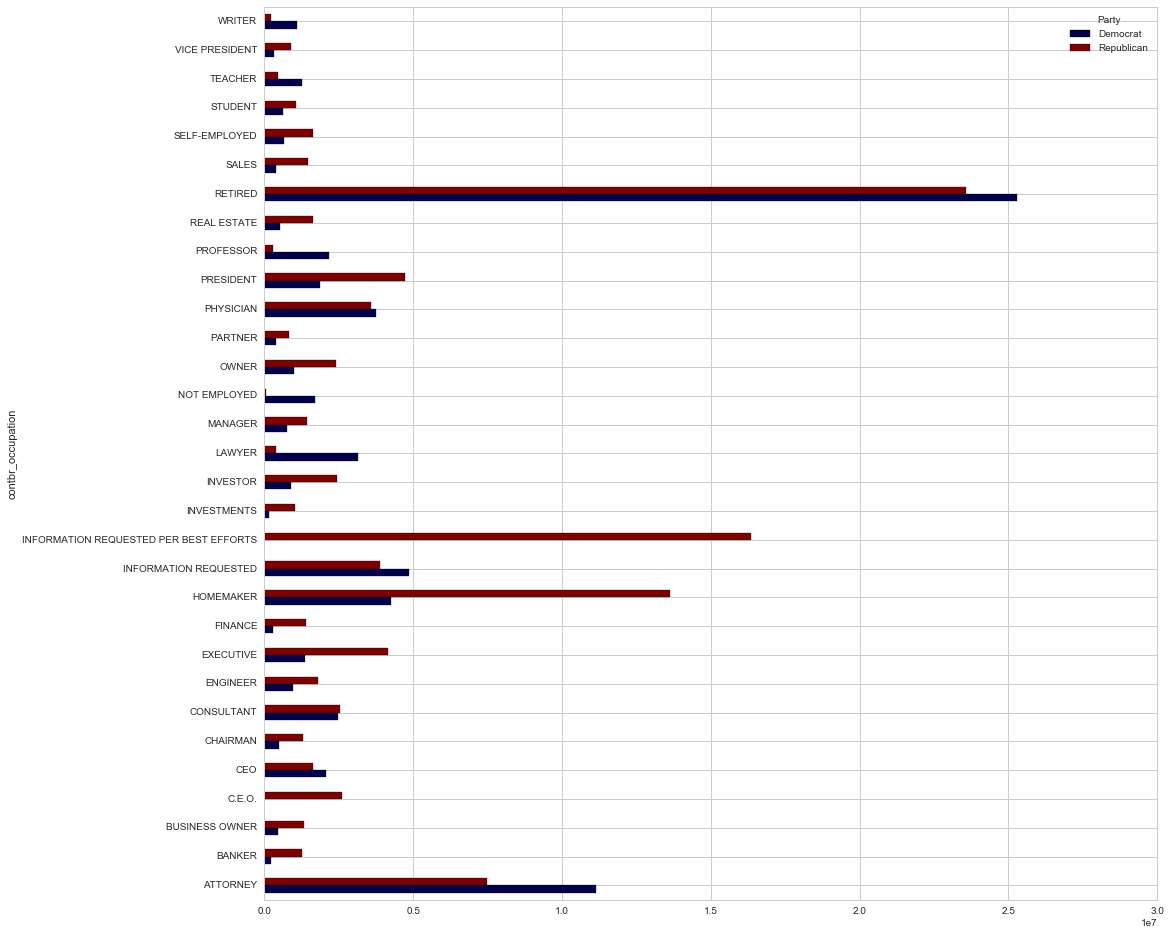

In [47]:
# yikes, hard to read, lets make it horizontal ~ use barh
#colormap seismic for blue and red
occupation_df.plot(kind='barh',figsize=(16,16),colormap='seismic')

In [48]:
# lastly, some cleanup - drop unavailable occupation
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

In [49]:
# clean up CEO and C.E.O.
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
#drop C.E.O.
occupation_df.drop('C.E.O.',inplace=True)

In [50]:
#clean up others Vice President, President, Chairman, CEO, Executive ~ Executive
occupation_df.loc['EXECUTIVE'] = occupation_df.loc['VICE PRESIDENT'] + occupation_df.loc['PRESIDENT'] +occupation_df.loc['CHAIRMAN'] + occupation_df.loc['CEO'] + occupation_df.loc['EXECUTIVE']
occupation_df.drop('VICE PRESIDENT',inplace=True)
occupation_df.drop('PRESIDENT',inplace=True)
occupation_df.drop('CHAIRMAN',inplace=True)
occupation_df.drop('CEO',inplace=True)

In [51]:
# Attorneys = Lawyers
occupation_df.loc['LAWYER'] = occupation_df.loc['LAWYER'] + occupation_df.loc['ATTORNEY']
#drop Attorney
occupation_df.drop('ATTORNEY',inplace=True)

In [52]:
# INVESTOR = INVESTMENTS, most likely
occupation_df.loc['INVESTOR'] = occupation_df.loc['INVESTOR'] + occupation_df.loc['INVESTMENTS']
#drop investments
occupation_df.drop('INVESTMENTS',inplace=True)

In [53]:
# FINANCE = BANKER, most likely
occupation_df.loc['FINANCE'] = occupation_df.loc['FINANCE'] + occupation_df.loc['BANKER']
#drop investments
occupation_df.drop('BANKER',inplace=True)

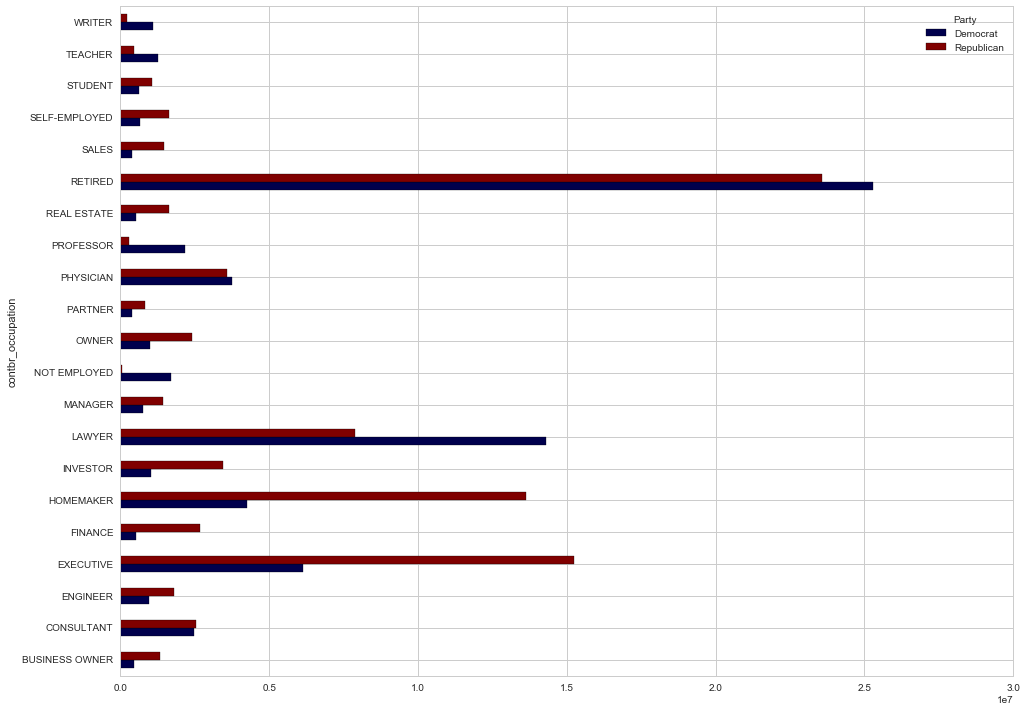

In [55]:
occupation_df.plot(kind='barh',figsize=(16,12),colormap='seismic')

Here is what we can tell base on donation amounts

Attorneys are more liberal as are professors, teachers and writers.
Executives (CEOS, VP, Pres, Chairman), Investors, Finance people are more convervative
Homemakers are more conservative too.
Consultants and physicians toe the line